In [6]:
from hicmatrix.lib import MatrixFileHandler
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck
from scipy.stats import mannwhitneyu
import h5py
import h5py
import logging
import numpy as np
import pandas as pd
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
from scipy.sparse import csr_matrix, dia_matrix, triu, tril, coo_matrix
import scipy.stats as stats
import os.path
import gc
import os
import h5py
import scipy.sparse as ss
import os
import sys
import numpy as np
import pandas as pd
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
from scipy.sparse import csr_matrix, dia_matrix, triu, tril, coo_matrix
import pyranges as pr
%matplotlib inline
import seaborn as sns

In [18]:
df2 = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/1kbp_raw/max/contact_top_gene1/totg_reg_prior_auc_top1_inter.csv', sep='\t')
#df = df[df['tp_thesh'] == 1]
#sns.histplot(df['prior_val'])

<AxesSubplot:xlabel='auc', ylabel='Count'>

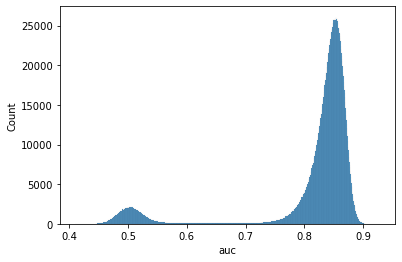

In [19]:
sns.histplot(df2['auc'])

In [9]:
df2 = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/max/contact_top_gene1/totg_reg_prior_auc_top1_inter.csv', sep='\t')
#df = df[df['tp_thesh'] == 1]
#sns.histplot(df['prior_val'])



In [20]:
 
df2 = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/1kbp_raw/max/contact_top_gene1/totg_reg_prior_only_top1_inter.csv', sep='\t')
#df = df[df['tp_thesh'] == 1]


In [21]:
species="human"
SRP_name='aggregates'
resolution='1kbp_raw'
resolution_human=1000

In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
auc_GO_terms_manw_three_list_hic_exp = []
for resolution in [100]:
    if species == 'drosophila':
        fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/1kbp_raw/max/inter_only/'
    else:
        fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/{resolution}kbp_raw/max/'
    for fname in ['hic_gene_corr_inter_excluding_intra_nanranked_ind_1_percent_per_chr.csv']:
        
        df = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/gene2go/{species}_gene2go.csv', delim_whitespace=True)

        df['val'] = 1

        go_table = pd.pivot_table(df, index=['NetworkIDs'],columns=['GO_term'])

        go_table = go_table.fillna(0)

        go_table = pd.DataFrame(go_table.values ,  index=go_table.index , columns = [x[1] for x in go_table.columns])


        #df_hic_auc = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_10_percent_per_chr_mouse_aggregates.csv', sep='\t')

        #df_hic_auc = pd.read_csv(f'{fpath}/{fname}', sep='\t')
        
        df_hic_auc = df2


        go_df_scores = go_table.merge(df_hic_auc, left_on=go_table.index, right_on='gene_id')
        GO_groups = pd.read_csv('/grid/gillis/home/lohia/notebooks_proj2_marker_v2/goslim_panther.txt', sep=" ", names=["del","go_id"])
        GO_groups_des = pd.read_csv('/grid/gillis/home/lohia/notebooks_proj2_marker_v2/goslim_panther_description.txt', sep=":", names=["del","des"])
        GO_groups_ben = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/genomes_jlee/aug4.GOslim', names=["go_id"])
        GO_groups_type = pd.read_csv('/grid/gillis/home/lohia/notebooks_proj2_marker_v2/goslim_panther_process.txt', sep=" ", names=["del","type"])




        from scipy.stats import mannwhitneyu
        import scipy.stats as stats
        z_list = []
        z_p_dict = []
        des_list = []
        for go_id in GO_groups["go_id"].tolist():
            
         #if go_id in GO_groups_ben["go_id"].tolist():

            try:

                    t_p_scores = go_df_scores[go_df_scores[go_id] ==1 ]['prior_val'].tolist()

                    t_n_scores = go_df_scores[go_df_scores[go_id] ==0 ]['prior_val'].tolist()
                


                    U1, p_val = mannwhitneyu(t_p_scores, t_n_scores, use_continuity=False, alternative='greater')
                    #nx, ny = len(t_p_scores), len(t_n_scores)
                    #N = nx + ny
                    #z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
                    #p = stats.norm.sf(z)
                    z_list.append(U1)
                    z_p_dict.append(p_val)

                    #print (p, p_val)
            except:
                print (go_id)
                z_list.append(np.nan)
                z_p_dict.append(np.nan)


        auc_GO_terms_manw = pd.DataFrame(list(zip(GO_groups["go_id"].tolist(),  z_p_dict , z_list, GO_groups_des['des'].tolist(), GO_groups_type['type'].tolist())), columns=['id', 'P_val_agg', 'U1_stat', 'des', 'type'])
        auc_GO_terms_manw['species'] = species
        auc_GO_terms_manw.dropna(subset=['P_val_agg'], inplace=True)
        p_val_adjusted = sm.stats.multipletests(auc_GO_terms_manw['P_val_agg'].values, method='fdr_bh')
        auc_GO_terms_manw['adjusted_P_val_agg'] = p_val_adjusted[1]
        auc_GO_terms_manw.to_csv(f'{fpath}/GO_{fname}', sep='\t', index=False)
        auc_GO_terms_manw_three_list_hic_exp.append(auc_GO_terms_manw)


GO:0000279
GO:0000324
GO:0000325
GO:0000329
GO:0000746
GO:0000747


/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0005618
GO:0005816
GO:0007134
GO:0009061
GO:0009103
GO:0009252
GO:0009272
GO:0009277
GO:0009279
GO:0009507
GO:0009526
GO:0009534
GO:0009535
GO:0009536
GO:0009555
GO:0009570
GO:0009579
GO:0009657
GO:0009658
GO:0009664
GO:0009668
GO:0009705
GO:0009706
GO:0009707
GO:0009737
GO:0009908
GO:0009941
GO:0010020
GO:0010027
GO:0010154
GO:0010228
GO:0015203
GO:0015979
GO:0015994
GO:0030288
GO:0030313
GO:0030428
GO:0031230
GO:0031505
GO:0031969
GO:0031976
GO:0034357
GO:0042170
GO:0042597
GO:0042651
GO:0042729
GO:0043332
GO:0044732
GO:0045036
GO:0045037
GO:0045272
GO:0045492
GO:0046999
GO:0048316
GO:0048366
GO:0048367
GO:0051274
GO:0051326
GO:0071555
GO:0072596
GO:0072598
GO:0097373
GO:0097478
GO:0097540


/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0097650
GO:0098762
GO:0098764
GO:0140513
GO:0140527
GO:0140534
GO:0140535
GO:0140546
GO:0140640
GO:0140657
GO:0140694
GO:1903475
GO:1990719
GO:1990720


/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


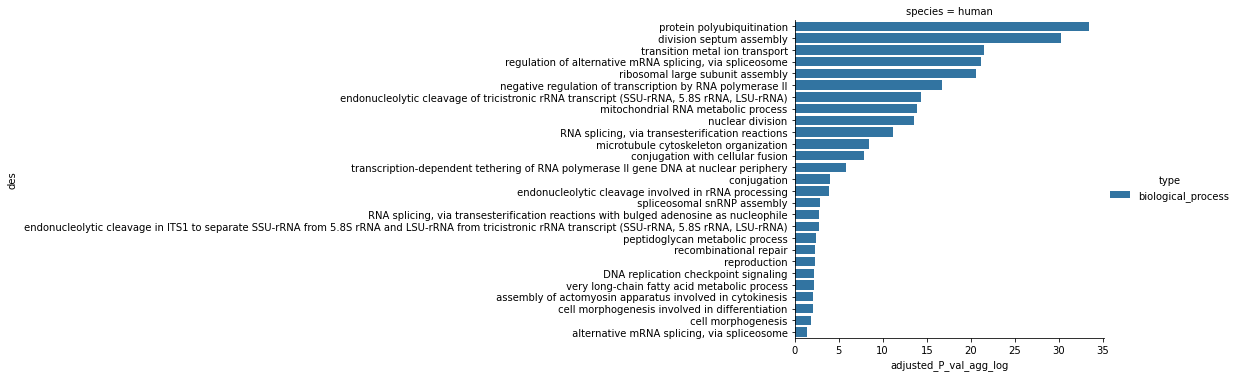

In [16]:
    df_whole = auc_GO_terms_manw_three_list_hic_exp[0]
    df_whole['adjusted_P_val_agg_log'] = [-1*np.log10(x) for x in df_whole['adjusted_P_val_agg']]

    sns.catplot(data=df_whole[(df_whole['adjusted_P_val_agg'] <= 0.05) & (df_whole['type'] == 'biological_process') ].sort_values(['adjusted_P_val_agg']), y='des', x='adjusted_P_val_agg_log', kind='bar', dodge=False, col='species', hue='type')
    

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


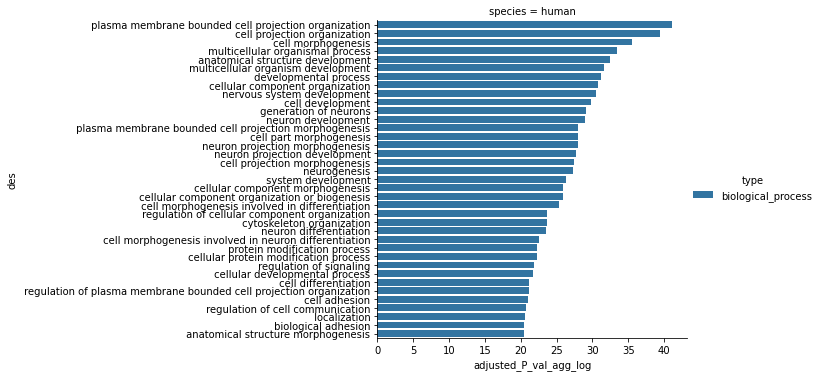

In [33]:
    df_whole = auc_GO_terms_manw_three_list_hic_exp[0]
    df_whole['adjusted_P_val_agg_log'] = [-1*np.log10(x) for x in df_whole['adjusted_P_val_agg']]

    sns.catplot(data=df_whole[(df_whole['adjusted_P_val_agg_log'] > 20) & (df_whole['type'] == 'biological_process') ].sort_values(['adjusted_P_val_agg']), y='des', x='adjusted_P_val_agg_log', kind='bar', dodge=False, col='species', hue='type')
    

In [36]:
df_prior = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/1kbp_raw/max/contact_top1/totg_reg_prior_only_top1_inter.csv', sep='\t')


df_prior.sort_values(by=['prior_val']).tail(100)

In [39]:
df_prior.sort_values(by=['prior_val'])

finite_bin  prior_val   bin_id
1092745       22344   0.000000  1092745
2305810       22609   0.000000  2305810
1091453       22344   0.000000  1091453
2305806       22609   0.000000  2305806
2305797       22609   0.000000  2305797
...             ...        ...      ...
2435032       22335   0.923215  2435032
2446849       22335   0.948332  2446849
584621        22084   0.969571   584621
2446839       22335   0.992344  2446839
281873        21808   0.997616   281873

[2875012 rows x 3 columns]

In [43]:
df_prior.shape[0]*1/100

28750.12

In [119]:
ff = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/1kbp_raw/max/pcc_df/pcc_1_inter_auc.csv', sep='\t')




In [108]:
ff = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/1kbp_raw/max/spr/inter_only/hic_gene_corr_inter_excluding_intra_chrom_pairs_hicexp_1_percent_per_chr.csv', sep='\t')



<AxesSubplot:xlabel='auc', ylabel='Count'>

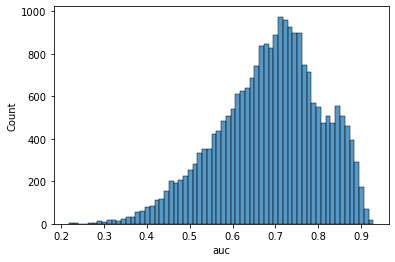

In [115]:
sns.histplot(ff['auc'])

In [120]:
ff['auc'].mean()

0.6041990758141433

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


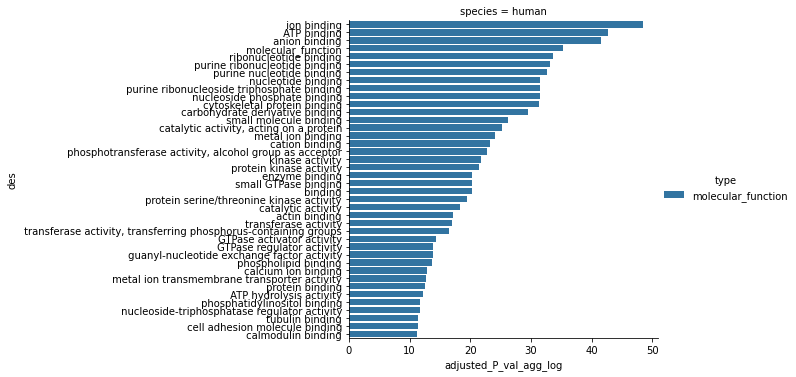

In [35]:
    df_whole = auc_GO_terms_manw_three_list_hic_exp[0]
    df_whole['adjusted_P_val_agg_log'] = [-1*np.log10(x) for x in df_whole['adjusted_P_val_agg']]

    sns.catplot(data=df_whole[(df_whole['adjusted_P_val_agg_log'] > 10) & (df_whole['type'] == 'molecular_function') ].sort_values(['adjusted_P_val_agg']), y='des', x='adjusted_P_val_agg_log', kind='bar', dodge=False, col='species', hue='type')
    